In [1]:
import pandas as pd

df = pd.read_csv('data/전처리/전처리_지하철_요일_고유역번호_승하차차이_위도경도0717.csv', index_col=0)

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
result = df.copy()
result_diff = result[result['승하차구분'] == '승하차 차이']

group_diff = result_diff.groupby(['호선','역명','고유역번호(외부역코드)'], as_index=False)[['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후','총 이용인원']].sum()
group_diff

,호선,역명,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
0,1호선,동대문,155,113261.0,26768.0,26547.0,-28786.0,-47572.0,-66362.0,-86091.0,...,78802.0,73501.0,42765.0,-25291.0,12341.0,20580.0,2997.0,-46609.0,-20630.0,151297.0
1,1호선,동묘앞,159,23388.0,-14617.0,-29326.0,-114699.0,-98605.0,-124470.0,-148233.0,...,184196.0,198052.0,118851.0,25669.0,4909.0,-3736.0,-27953.0,-31192.0,-20168.0,-130353.0
2,1호선,서울역,150,7663.0,-427924.0,-763452.0,-1717988.0,-1065395.0,-225156.0,49613.0,...,361424.0,818915.0,1360735.0,531961.0,391231.0,497329.0,315992.0,107583.0,-9669.0,539506.0
3,1호선,시청,151,-26127.0,-235838.0,-705013.0,-2147146.0,-916306.0,-334523.0,-247265.0,...,341844.0,716866.0,1573974.0,559213.0,512082.0,477399.0,305071.0,79295.0,-3552.0,-93761.0
4,1호선,신설동,156,79422.0,58.0,-39446.0,-322325.0,-158521.0,-57362.0,1906.0,...,111146.0,182812.0,271606.0,872.0,8457.0,-4719.0,-29119.0,-58711.0,-17903.0,148729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,8호선,신흥,2825,37171.0,43344.0,128477.0,141160.0,68305.0,24845.0,17682.0,...,-18848.0,-37570.0,-114641.0,-119202.0,-57990.0,-57901.0,-56857.0,-40524.0,-11871.0,-100447.0
273,8호선,암사,2811,164193.0,280390.0,855554.0,1025821.0,451618.0,205363.0,131109.0,...,-128411.0,-252050.0,-562538.0,-539967.0,-272307.0,-230710.0,-283184.0,-169217.0,-49779.0,740022.0
274,8호선,잠실(송파구청),2815,-11876.0,-70454.0,-270394.0,-784816.0,-430249.0,-270970.0,-254722.0,...,52270.0,124351.0,281959.0,206157.0,294036.0,335932.0,247715.0,61811.0,1136.0,-934935.0
275,8호선,장지,2820,35356.0,68645.0,222131.0,117571.0,22913.0,22119.0,-11175.0,...,38764.0,133621.0,-37306.0,-121650.0,18439.0,4690.0,-81800.0,-67389.0,-18916.0,319917.0


In [4]:
diff_top = group_diff.nlargest(10, '총 이용인원')
diff_top['역명']

30              선릉
64      교대(법원.검찰청)
218          고속터미널
104             사당
221         군자(능동)
213    화랑대(서울여대입구)
45       왕십리(성동구청)
152        신정(은행정)
7             종로3가
112             쌍문
Name: 역명, dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')

In [6]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [7]:
diff_guro = group_diff[group_diff['역명']=='구로디지털단지']
diff_guro = diff_guro.loc[:,'06시이전':'24시이후']
diff_guro = diff_guro.T

diff_guro = diff_guro.reset_index()
diff_guro.head(2)

,index,14
0,06시이전,381767.0
1,06-07시간대,384529.0


In [8]:
diff_guro.rename(columns={'index':'시간',14: '이용인원'}, inplace=True)
diff_guro.head(2)

,시간,이용인원
0,06시이전,381767.0
1,06-07시간대,384529.0


In [9]:
diff_guro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      20 non-null     object 
 1   이용인원    20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [10]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

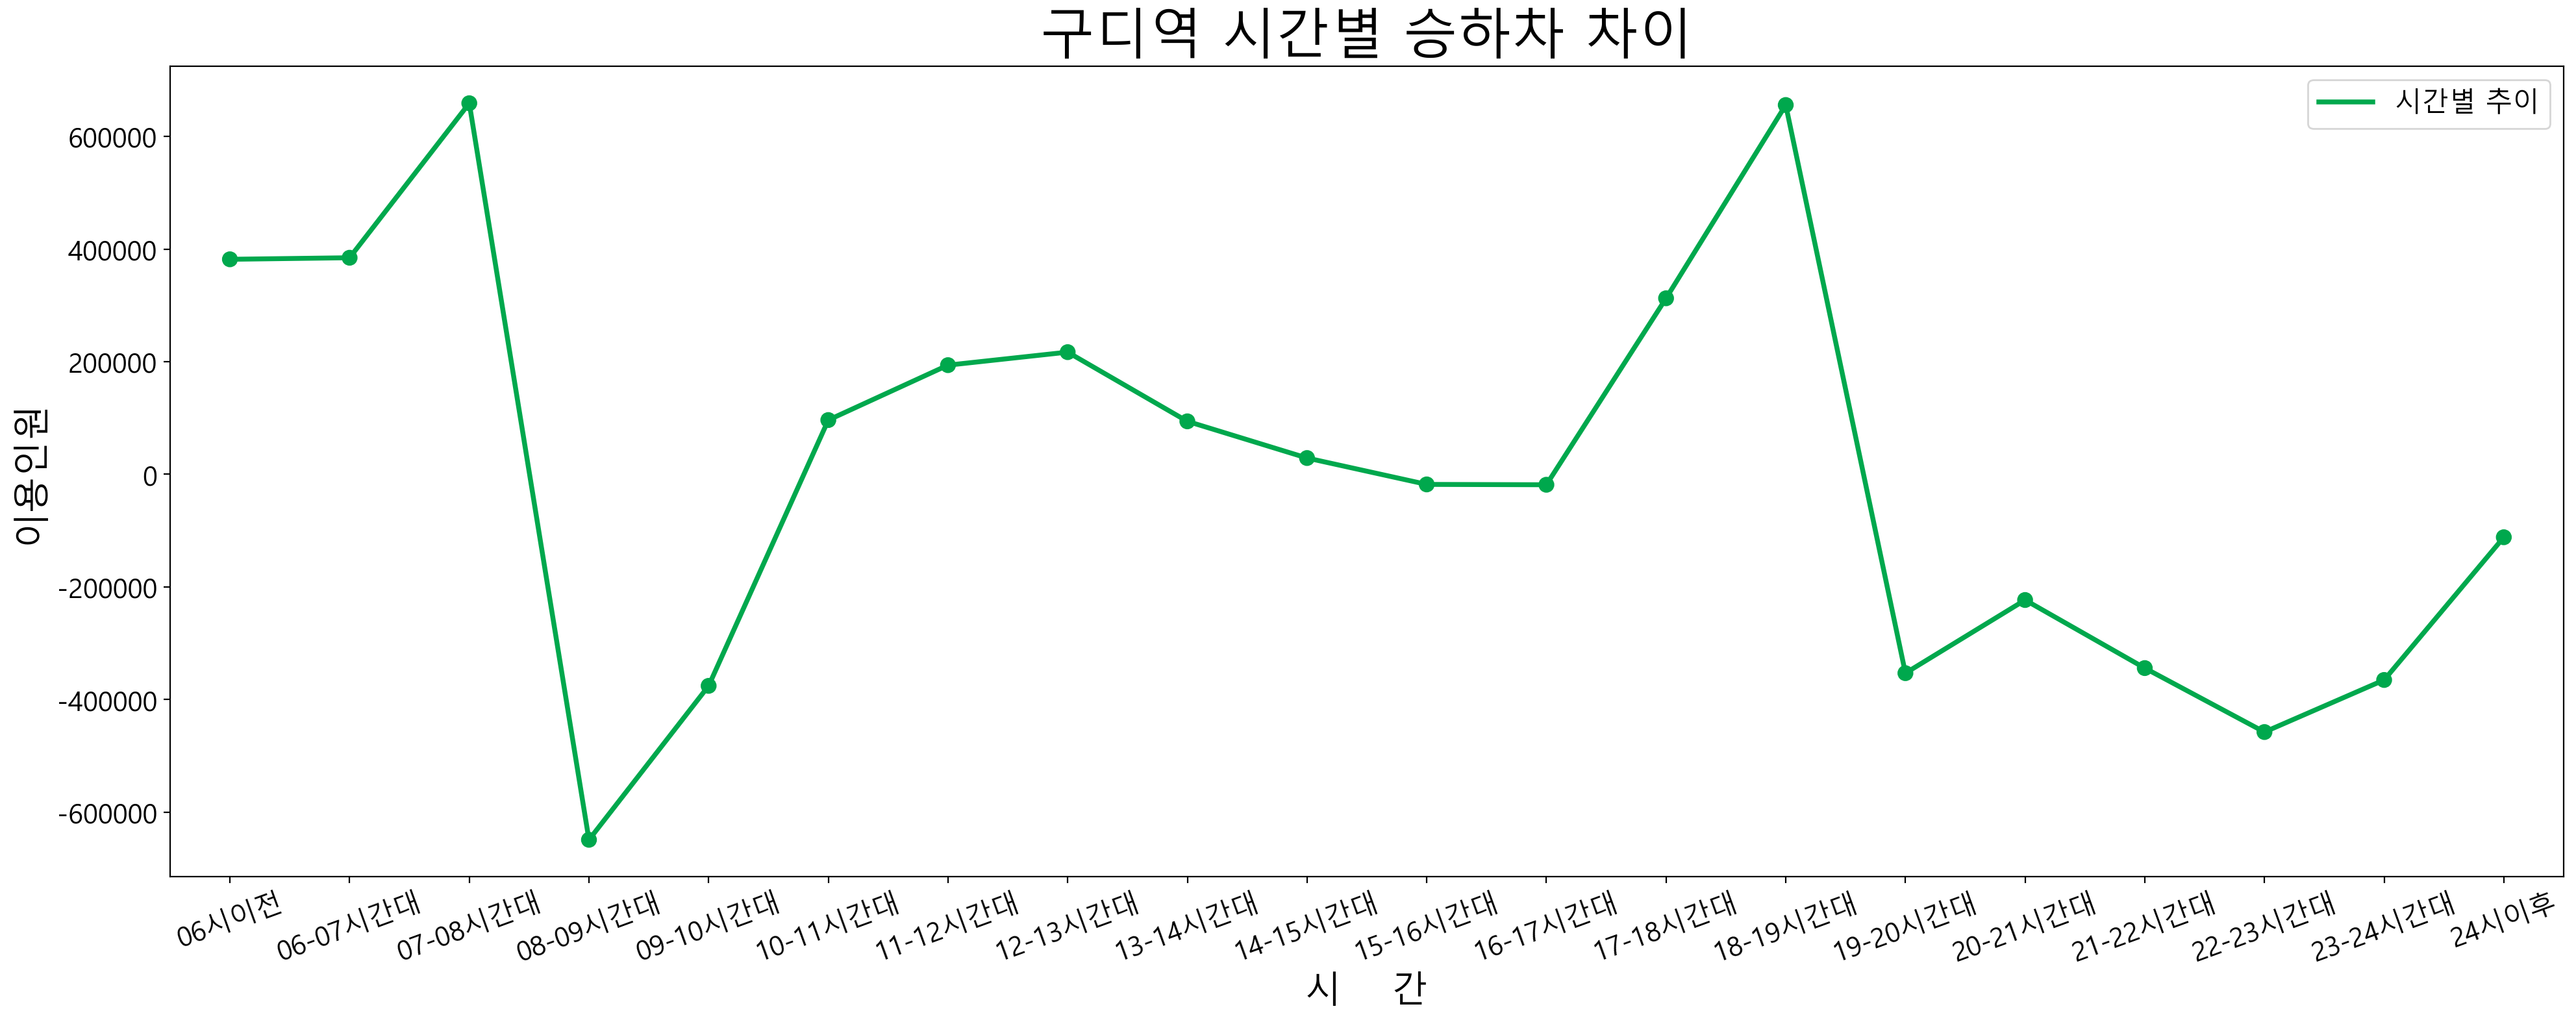

In [11]:
plt.figure(figsize=(20, 8))
sns.pointplot(data=diff_guro, x='시간', y='이용인원', color='#00A84D')

plt.xticks(size=15, rotation=20)
plt.yticks(size=15)
plt.title('구디역 시간별 승하차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)

plt.tight_layout()

plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

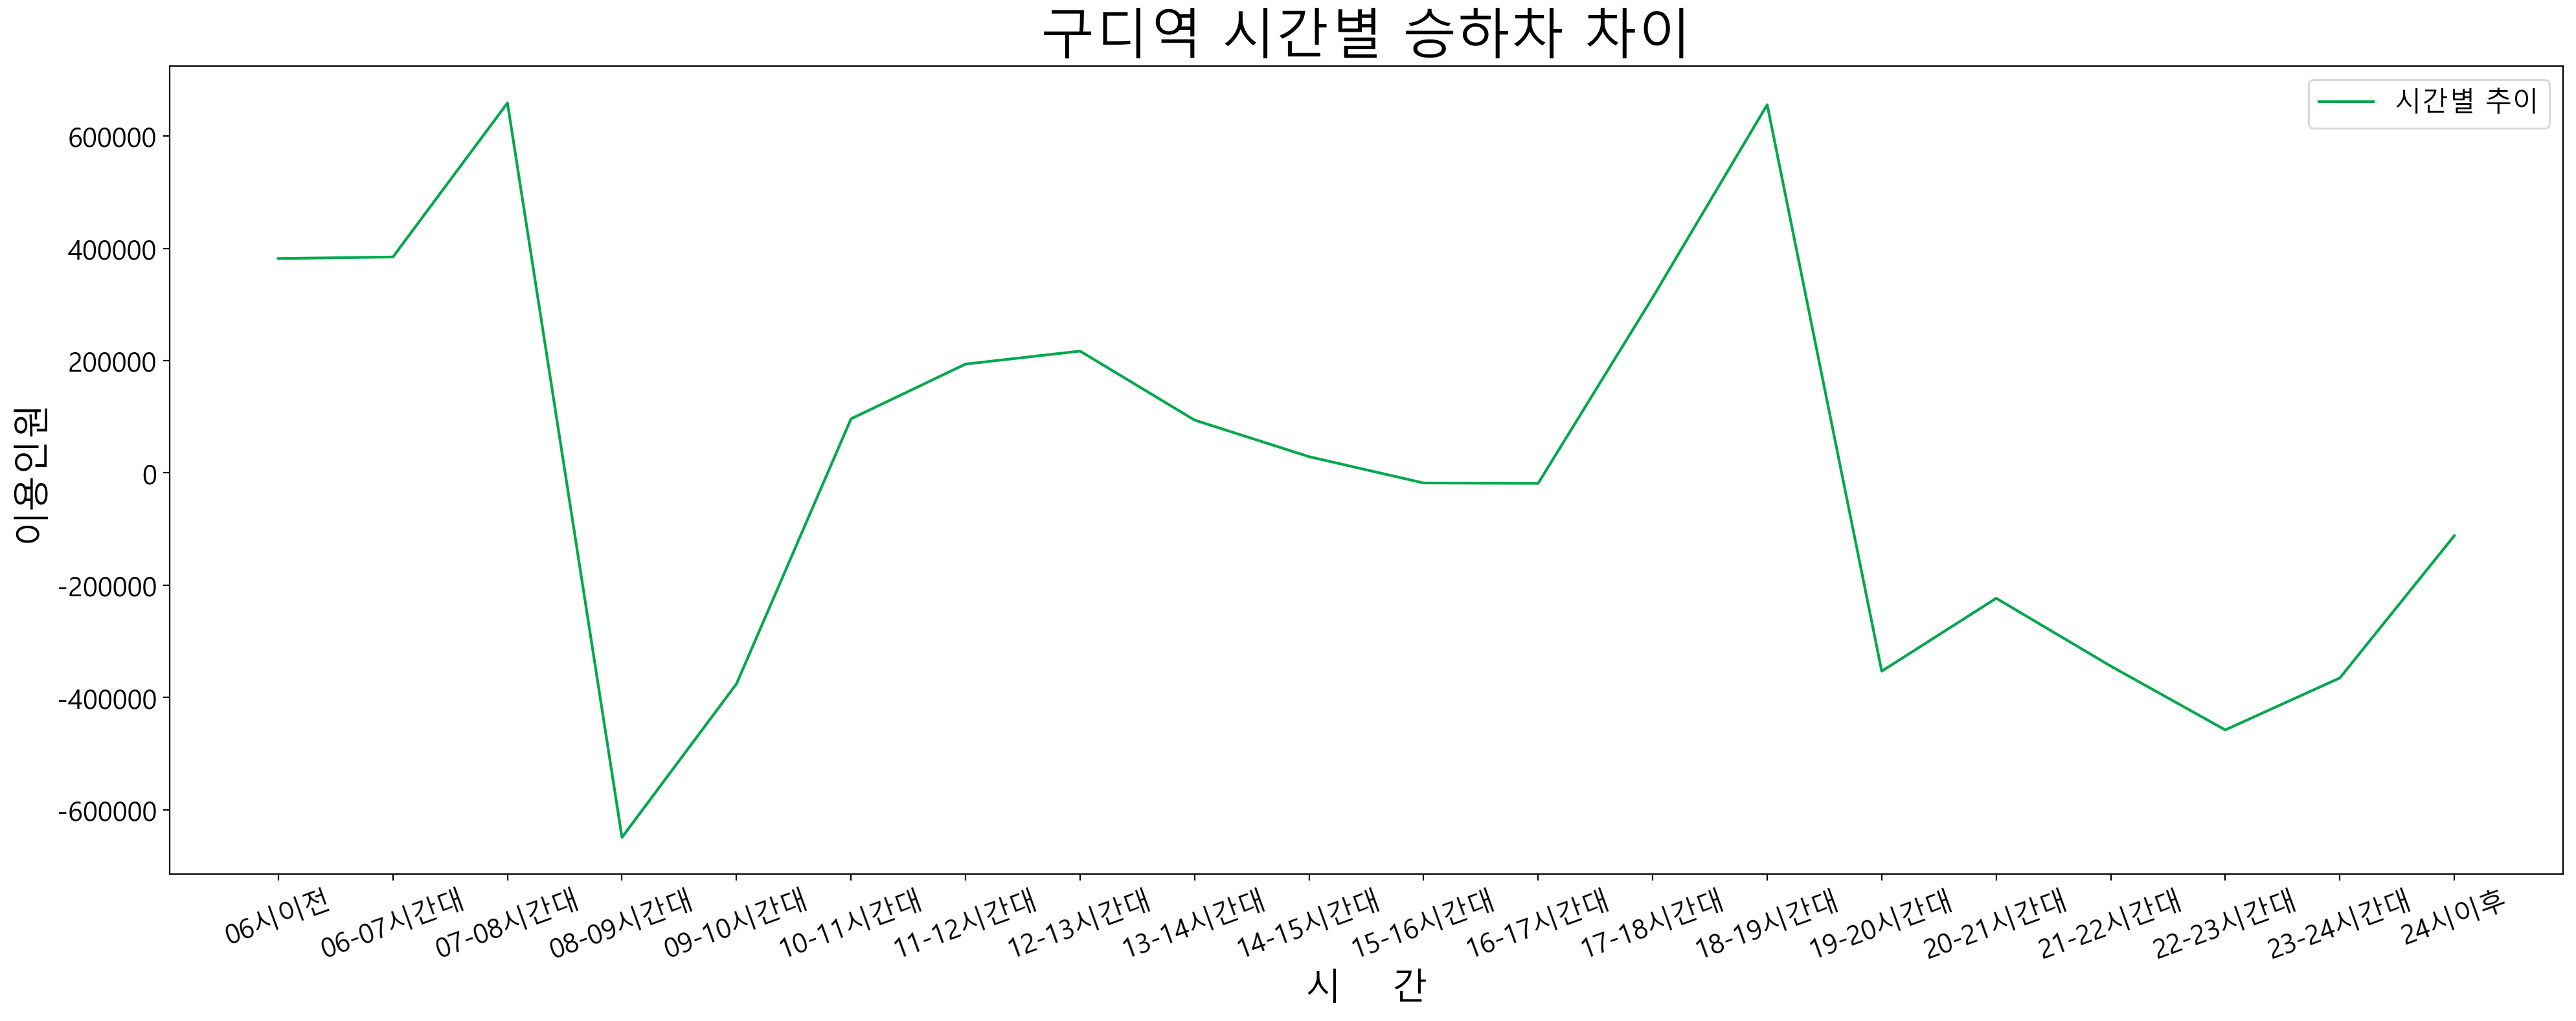

In [12]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=diff_guro, x='시간', y='이용인원', color='#00A84D')

plt.xticks(size=15, rotation=20)
plt.yticks(size=15)
plt.title('구디역 시간별 승하차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)

plt.tight_layout()

plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

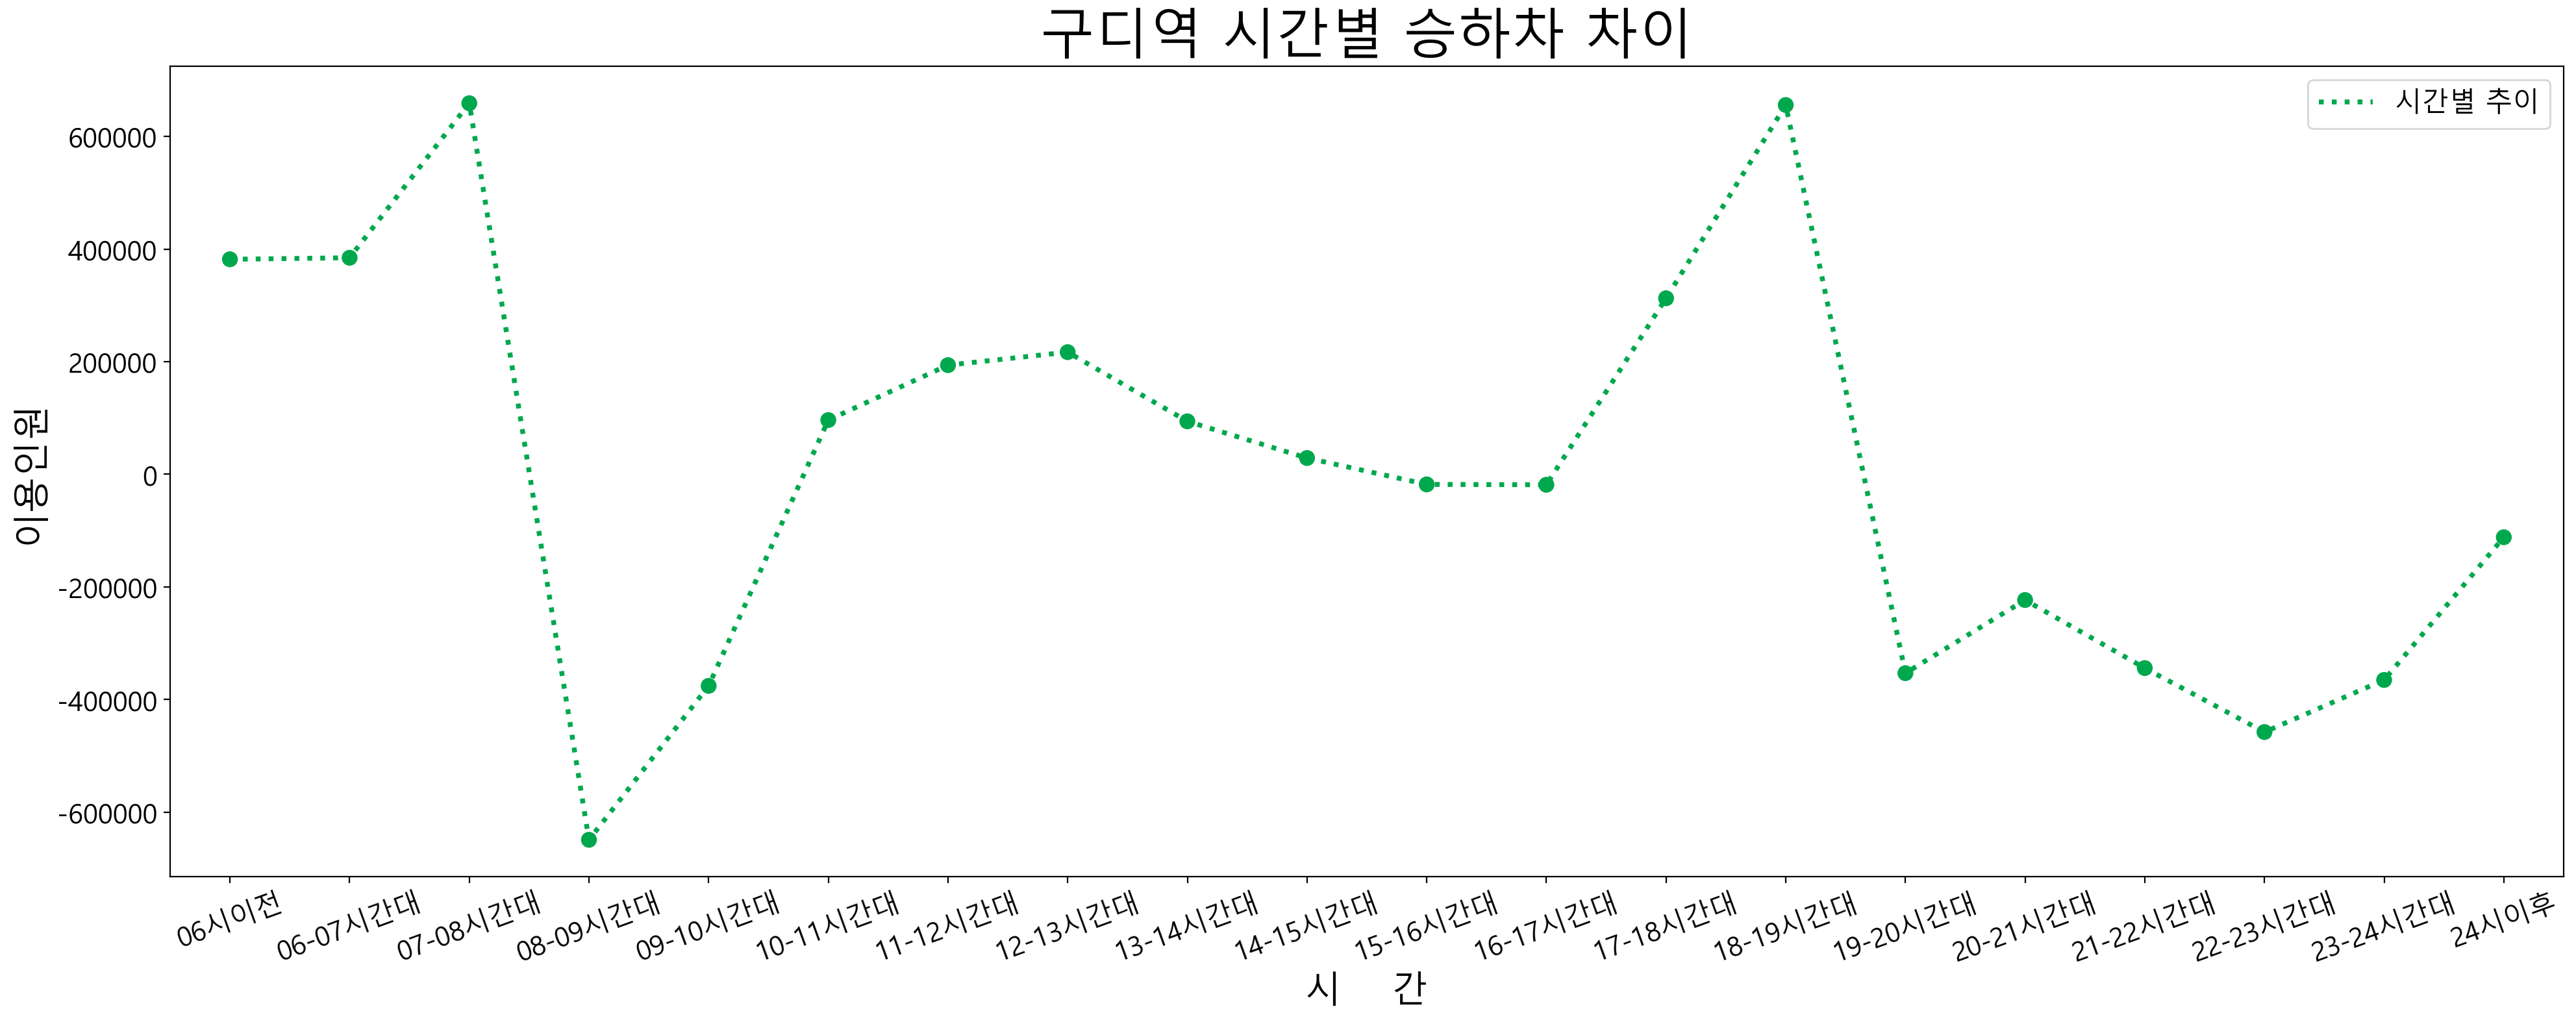

In [13]:
plt.figure(figsize=(20, 8))
sns.pointplot(data=diff_guro, x='시간', y='이용인원', color='#00A84D',
              linestyles=[':','--'], markers=['o','x'])

plt.xticks(size=15,rotation=20)
plt.yticks(size=15)
plt.title('구디역 시간별 승하차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)

plt.tight_layout()

plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

 인터넷 검색 참조: https://www.geeksforgeeks.org/python-seaborn-pointplot-method/

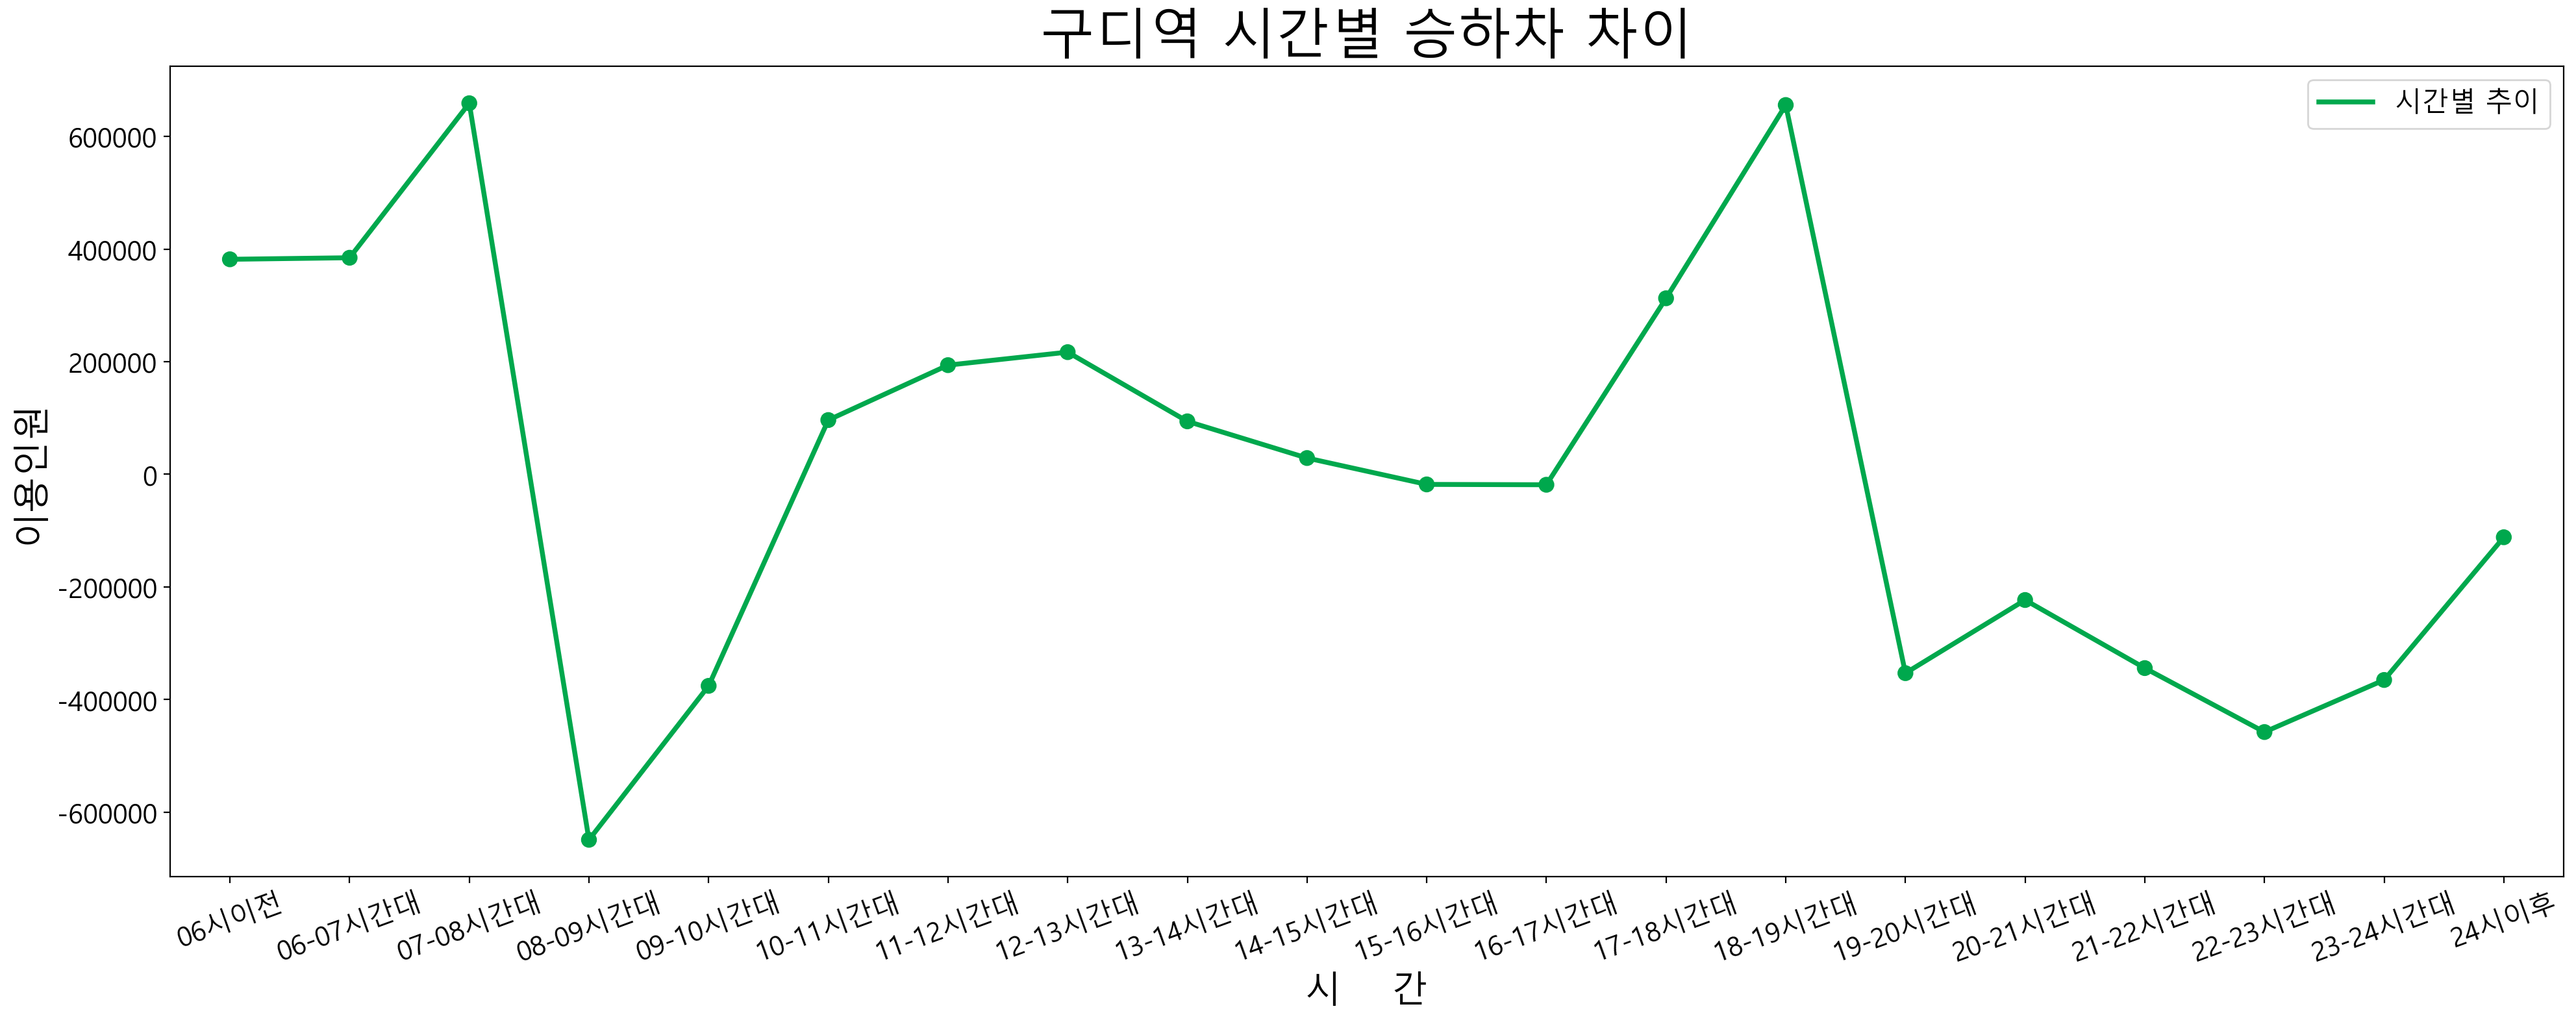

In [14]:
plt.figure(figsize=(20, 8))

# draw pointplot
sns.pointplot(data = diff_guro,
              x = '시간',
              y = '이용인원',
              color='#00A84D')

plt.xticks(size=15, rotation=20)
plt.yticks(size=15)
plt.title('구디역 시간별 승하차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)

plt.tight_layout()

plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

In [1]:
plt.figure(figsize=(20, 8)) 

# draw pointplot
sns.pointplot(x = '시간',
              y = '이용인원',
              color='#00A84D',
              linestyles = '-.',
              markers = '^',
              data = diff_guro)

plt.xticks(size=15, rotation=10)
plt.yticks(size=15)
plt.title('구디역 시간별 승하차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)

plt.tight_layout()

plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

NameError: name 'plt' is not defined

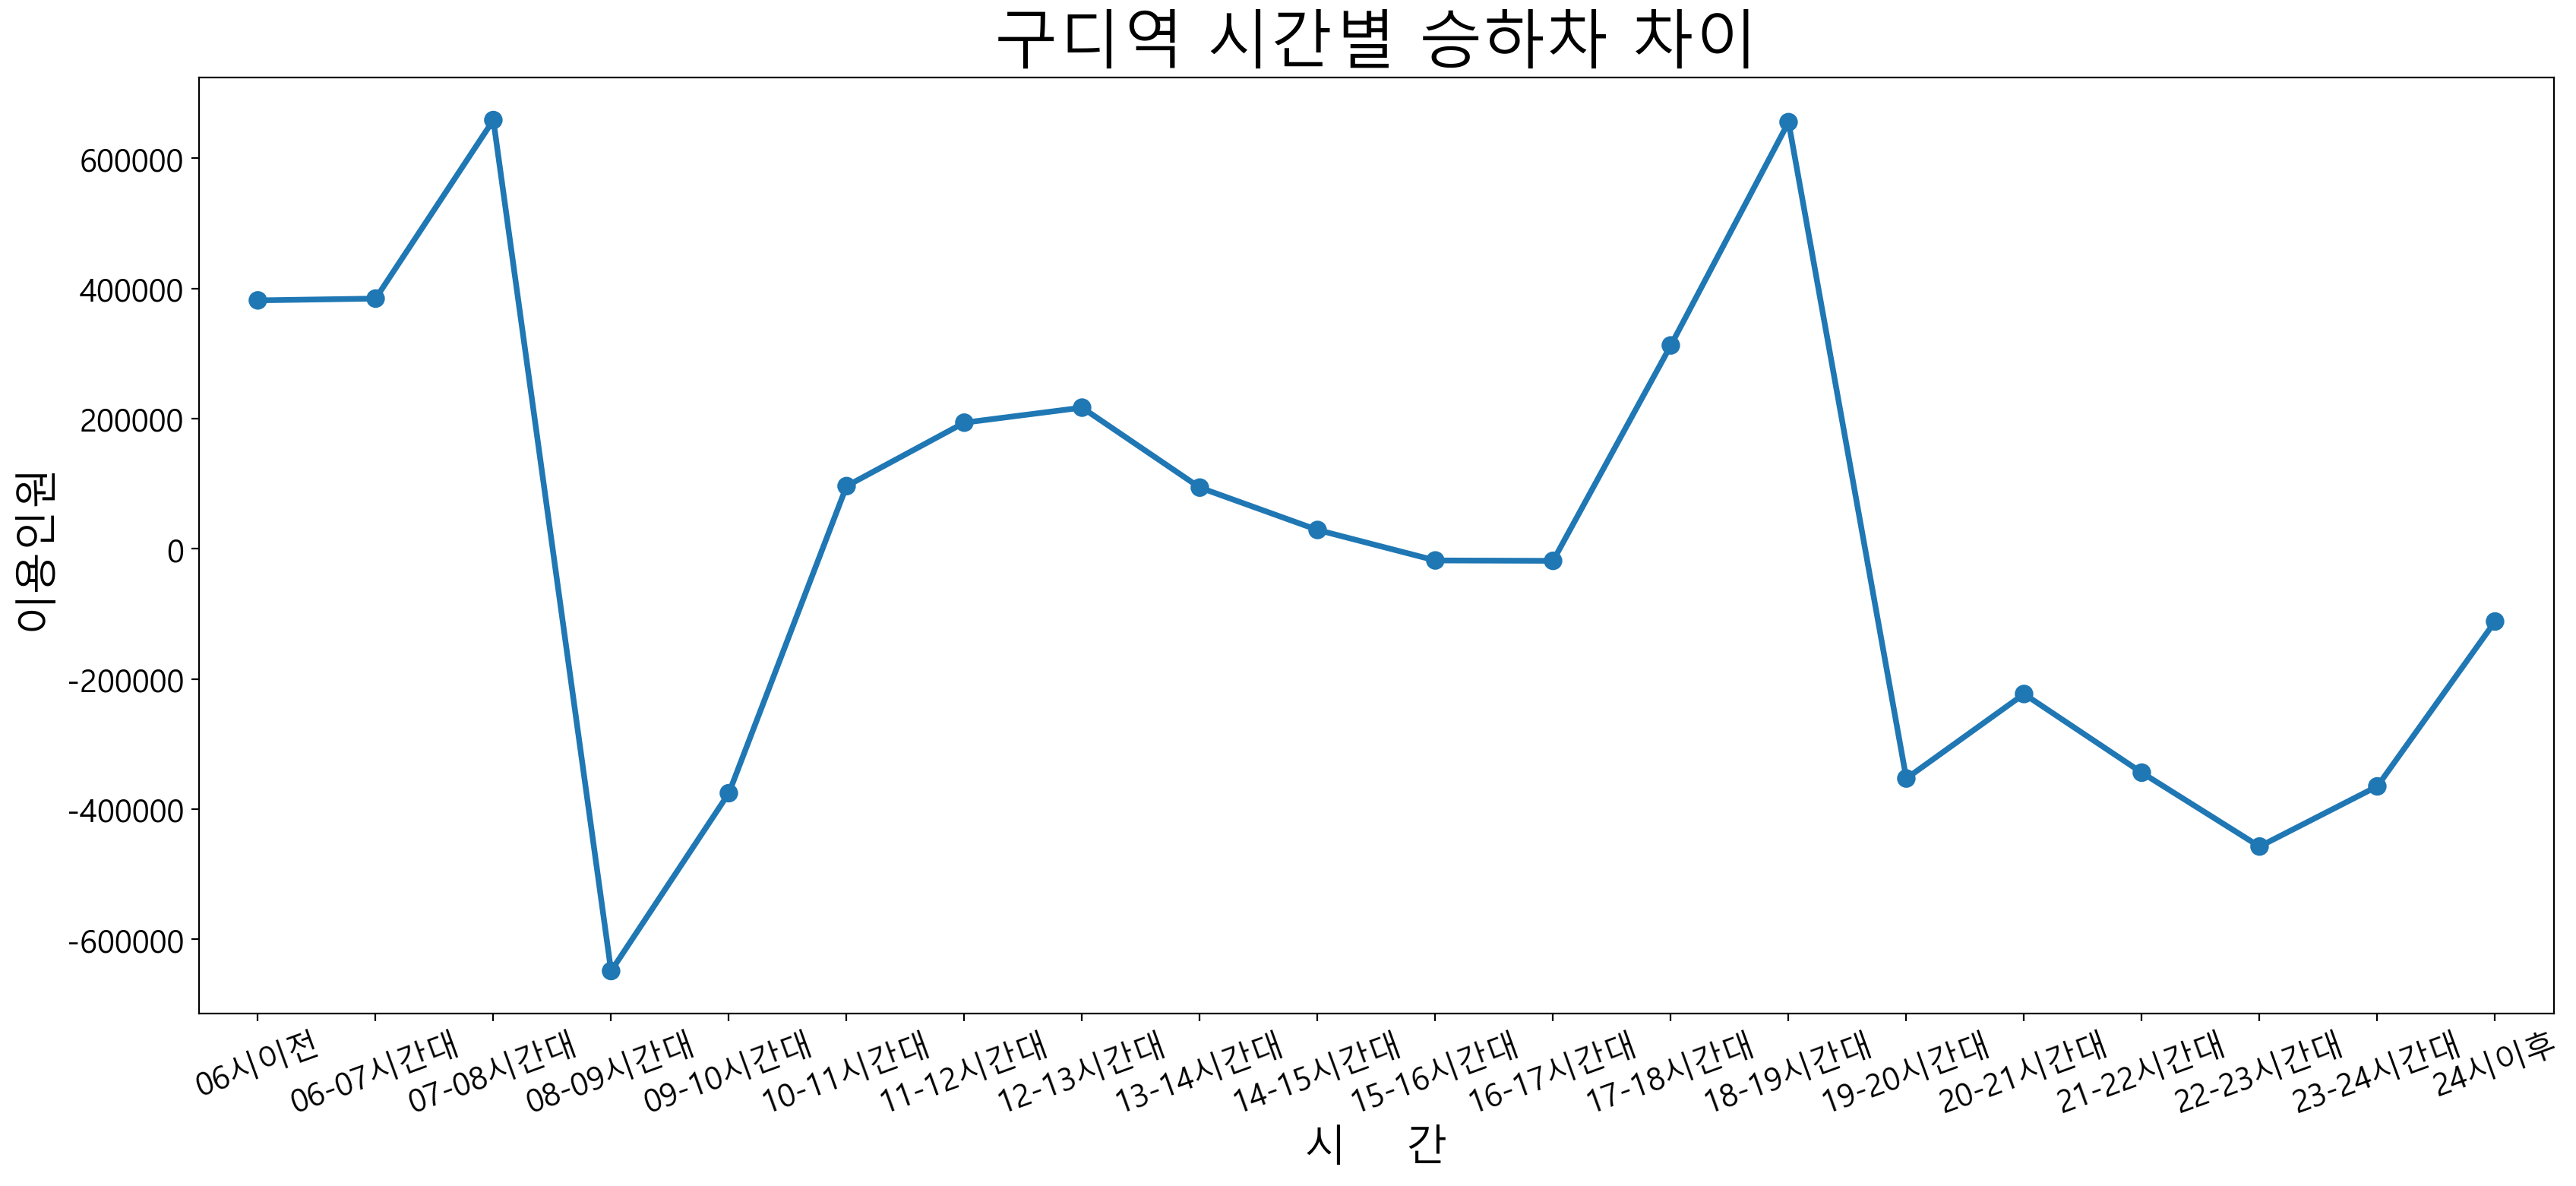

In [16]:
plt.figure(figsize=(20, 8)) 
sns.pointplot(data=diff_guro, x='시간', y='이용인원')
plt.xticks(size=15, rotation=20)
plt.yticks(size=15)
plt.title('구디역 시간별 승하차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)
plt.show()

### 결론 "seaborn.pointplot"은 범주형 변수로 그룹화하고 신뢰 구간을 사용하여 집계 값을 플로팅 하는데, 적용하고자 하는 데이터 구조와는 상이함. 

특징:
1. 범주형 데이터 시각화: pointplot은 주로 범주형 데이터를 시각화하는데 사용됩니다. 하나 이상의 범주형 변수를 X축에 배치하고, 연속형 변수를 Y축에 배치하여 그룹 간의 비교를 시각화할 수 있습니다.

2. 포인트 플롯: pointplot은 그래프를 점(point)들로 표현합니다. 각 점은 주어진 X축 값에 대응하는 Y축 값의 평균 또는 중앙값을 나타내며, 표준 편차 또는 신뢰 구간도 표시할 수 있습니다.

3. 선 표시: pointplot은 점(point)뿐만 아니라 선(line)을 표시할 수도 있습니다. 이는 특정 범주형 변수에 대한 변화를 시각화할 때 유용합니다.

4. 오차 막대: pointplot은 각 포인트에 대한 오차 막대(error bar)를 표시할 수 있습니다. 이는 데이터의 불확실성을 시각화하는데 도움을 줍니다.

5. 여러 그룹 시각화: hue 매개변수를 사용하여 여러 그룹 간의 비교를 쉽게 시각화할 수 있습니다. hue 매개변수에 다른 범주형 변수를 지정하면, 해당 변수의 각 값에 따라 색상을 다르게 표시하여 그룹 간 차이를 쉽게 파악할 수 있습니다.

6. 스타일과 컬러 팔레트: Seaborn은 다양한 스타일과 컬러 팔레트를 제공하여 그래프의 모양을 변경할 수 있습니다. pointplot을 그리기 전에 스타일과 컬러 팔레트를 설정하여 그래프를 더욱 효과적으로 표현할 수 있습니다.

이러한 특징들로 인해 pointplot은 범주형 데이터의 분포, 그룹 간의 비교, 변화 추세 등을 시각화하는데 유용한 함수입니다. 그러나 데이터의 특성에 따라 적절한 시각화 방법을 선택하는 것이 중요하며, 다른 Seaborn 함수들과 함께 조합하여 더 다양한 시각화를 구성할 수도 있습니다.
